# Explore here

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, DecisionTreeRegressor
from sklearn.metrics import *
from imblearn.metrics import specificity_score
import imblearn



In [2]:
#Load CSV
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")

data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
#Drop duplicates
clean_data = data.drop_duplicates().reset_index(drop = True)

clean_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# Number of patiens with Diabetes and without
clean_data.Outcome.value_counts()

# 0 = No Diabetes 1 = Diabetes (Lo habitual es que 1 es "éxito")

Outcome
0    500
1    268
Name: count, dtype: int64

In [5]:
#Las variables menos la que dropeamos
X = clean_data.drop("Outcome", axis = 1)
# La variable dropeada
y = clean_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

selection_model = SelectKBest(k = 6)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

#Training set
X_train_sel

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,9.0,145.0,130.0,37.9,0.637,40.0
1,10.0,129.0,0.0,41.2,0.441,38.0
2,7.0,102.0,105.0,37.2,0.204,45.0
3,8.0,120.0,0.0,25.0,0.409,64.0
4,2.0,120.0,105.0,39.7,0.215,29.0
...,...,...,...,...,...,...
609,2.0,157.0,440.0,39.4,0.134,30.0
610,7.0,187.0,392.0,33.9,0.826,34.0
611,13.0,126.0,0.0,43.4,0.583,42.0
612,4.0,171.0,0.0,43.6,0.479,26.0


In [6]:
# Testing set
X_test_sel

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7.0,136.0,135.0,26.0,0.647,51.0
1,1.0,151.0,0.0,26.1,0.179,22.0
2,6.0,109.0,0.0,25.0,0.206,27.0
3,3.0,61.0,0.0,34.4,0.243,46.0
4,1.0,116.0,180.0,36.1,0.496,25.0
...,...,...,...,...,...,...
149,6.0,99.0,54.0,26.9,0.497,32.0
150,3.0,115.0,140.0,38.1,0.150,28.0
151,8.0,188.0,0.0,47.9,0.137,43.0
152,5.0,136.0,0.0,0.0,0.640,69.0


In [7]:
#Esto lo hacemos para evitar nuevo index al cargar de nuevo el data
X_train_sel["Outcome"] = y_train.values
X_test_sel["Outcome"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

GRAPH

In [8]:
#Traemos de vuelta el data frame sin el indice
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,9.0,145.0,130.0,37.9,0.637,40.0,1
1,10.0,129.0,0.0,41.2,0.441,38.0,1
2,7.0,102.0,105.0,37.2,0.204,45.0,0
3,8.0,120.0,0.0,25.0,0.409,64.0,0
4,2.0,120.0,105.0,39.7,0.215,29.0,0
...,...,...,...,...,...,...,...
609,2.0,157.0,440.0,39.4,0.134,30.0,0
610,7.0,187.0,392.0,33.9,0.826,34.0,1
611,13.0,126.0,0.0,43.4,0.583,42.0,1
612,4.0,171.0,0.0,43.6,0.479,26.0,1


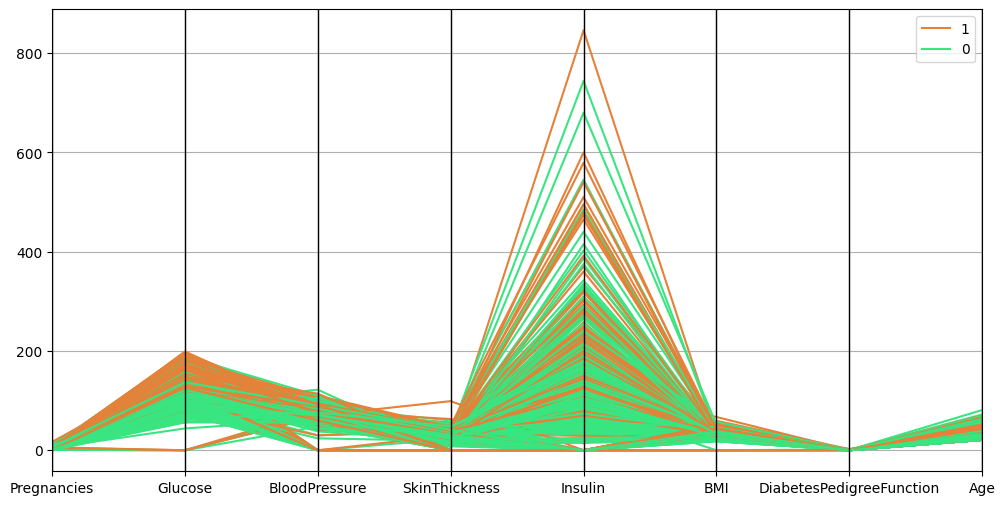

In [9]:
plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(clean_data, "Outcome", color = ("#E58139", "#39E581", "#ffd343"))

plt.show()

INICIALIZATION AND TRAINING OF MODEL

In [10]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

In [11]:
model = DecisionTreeClassifier(random_state = 1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

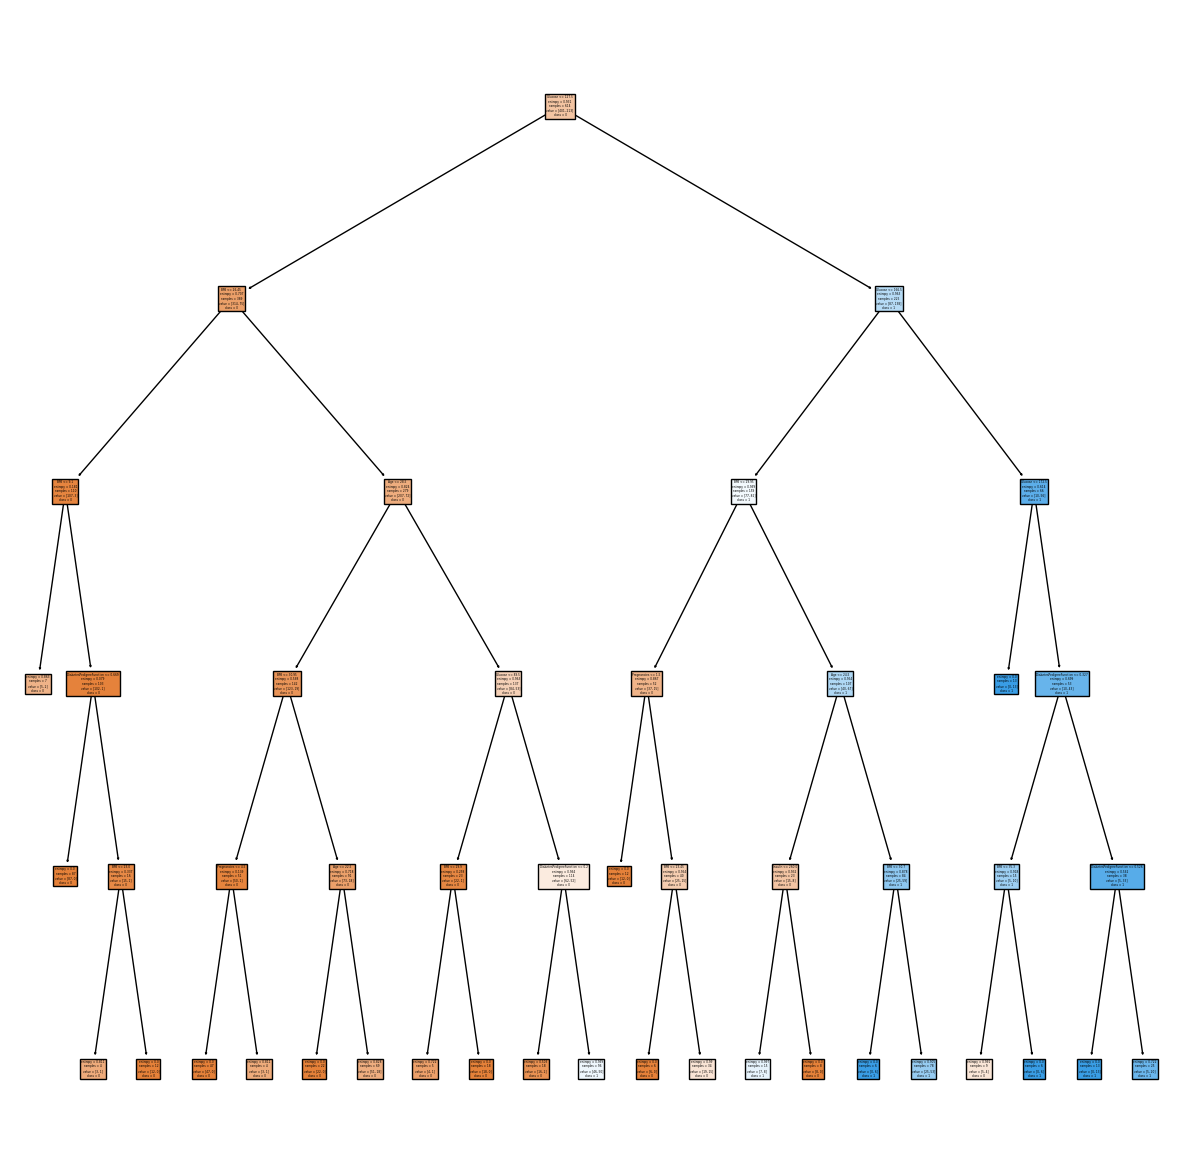

In [26]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [12]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [13]:
accuracy_score(y_test, y_pred)

0.7402597402597403

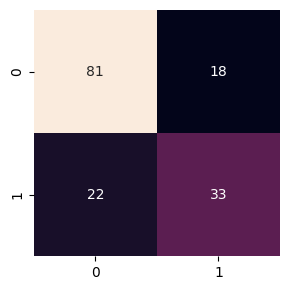

In [15]:
import seaborn as sns

data_matrix = confusion_matrix(y_test, y_pred)

# Let's draw this matrix to make it more visual
matrix_df = pd.DataFrame(data_matrix)

plt.figure(figsize = (3, 3))
sns.heatmap(matrix_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

OPTIMIZACIÓN MODELO

In [27]:
hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                              min_samples_leaf=4,
                                              random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [28]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [29]:
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 5, min_samples_leaf = 4, min_samples_split = 2, random_state = 1)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       random_state=1)

In [30]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [31]:
accuracy_score(y_test, y_pred)

0.7727272727272727

Modelo complejo

In [17]:
# Crear un árbol de decisión complejo
complex_tree = DecisionTreeClassifier(max_depth=100, min_samples_leaf=1, random_state=1)
complex_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=100, random_state=1)

In [18]:
# Evaluar el modelo complejo en entrenamiento y prueba
train_pred_complex = complex_tree.predict(X_train)
test_pred_complex = complex_tree.predict(X_test)

Modelo Simple

In [19]:
# Crear un árbol de decisión simple
simple_tree = DecisionTreeClassifier(max_depth=3, max_features=X_train.shape[1]//2, min_samples_leaf=20, random_state=1)
simple_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=3, min_samples_leaf=20,
                       random_state=1)

In [20]:
# Evaluar el modelo simple en entrenamiento y prueba
train_pred_simple = simple_tree.predict(X_train)
test_pred_simple = simple_tree.predict(X_test)

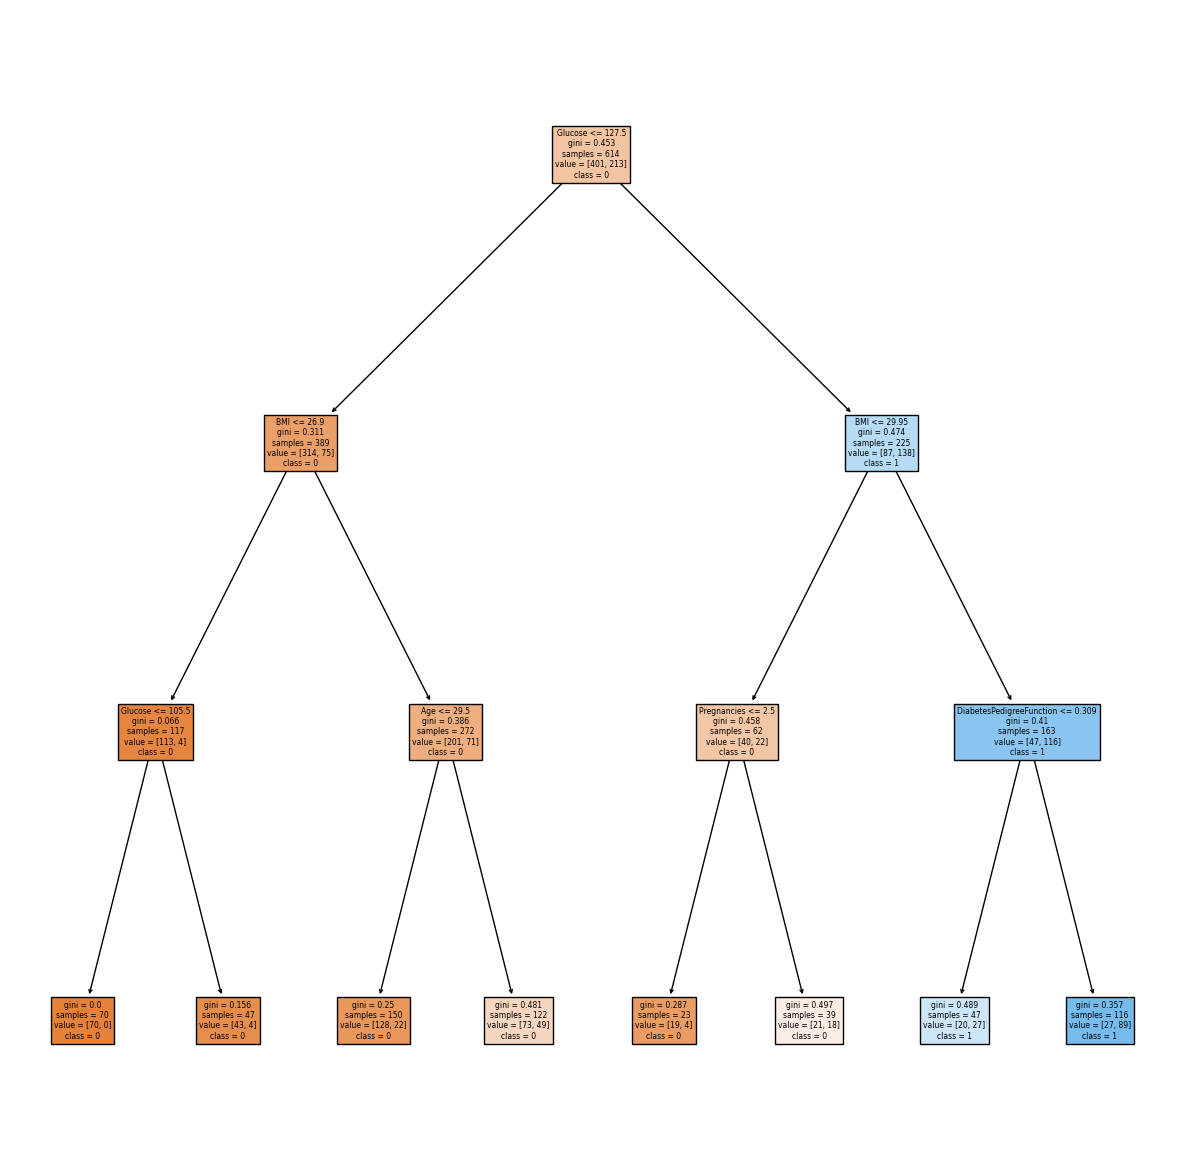

In [32]:
# Plotear el simple tree
fig = plt.figure(figsize=(15,15))

tree.plot_tree(simple_tree, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

METRICAS MODELOS

In [ ]:
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df

In [ ]:
# Métricas del modelo simple
get_metrics(y_train, y_test, train_pred_simple, test_pred_simple)


,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.765472,0.617021,0.713697,0.711656,0.544601,0.882793
Test,0.798701,0.686869,0.758586,0.772727,0.618182,0.898990
Diferencia,-0.033229,-0.069847,-0.044889,-0.061071,-0.073581,-0.016197


In [ ]:
# Métricas del modelo complejo
get_metrics(y_train, y_test, train_pred_complex, test_pred_complex)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,1.00000,1.000000,1.000000,1.000000,1.0,1.000000
Test,0.74026,0.622642,0.709091,0.647059,0.6,0.818182
Diferencia,0.25974,0.377358,0.290909,0.352941,0.4,0.181818


In [25]:
from pickle import dump

dump(model, open("../models/tree_classifier_crit-entro_maxdepth-5_minleaf-4_minsplit2_1.sav", "wb"))